In [1]:
import pandas as pd
import numpy as np

**Text Processing**

1.   Retrieve the book from the Internet and split it by chapter 
2.   Extract character names that appear in the text
3.   Match each character occurrence with the corresponding entity







In [2]:
#text processing
!git clone https://github.com/dldk-gael/novel_story_building.git

Cloning into 'novel_story_building'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 137 (delta 27), reused 129 (delta 23), pack-reused 0
Receiving objects: 100% (137/137), 29.27 MiB | 24.95 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [3]:
!cd novel_story_building

In [4]:
book = []
for i in range(1,17):
  if(i < 10):
    with open('/content/novel_story_building/data/book_by_chapter/hp1/0{}.txt'.format(i)) as f:
      book.append(f.readlines())
  else:
    with open('/content/novel_story_building/data/book_by_chapter/hp1/{}.txt'.format(i)) as f:
      book.append(f.readlines())



  


In [5]:
book[15] #book has all the chapters of the first harry potter book now

['\n',
 'THE MAN WITH TWO FACES It was Quirrell. \n',
 '\n',
 '"You!" gasped Harry. \n',
 '\n',
 "Quirrell smiled. His face wasn't twitching at all. \n",
 '\n',
 '"Me," he said calmly. "I wondered whether I\'d be meeting you here, Potter." \n',
 '\n',
 '"But I thought -- Snape --" \n',
 '\n',
 '"Severus?" Quirrell laughed, and it wasn\'t his usual quivering treble, either, but cold and sharp. "Yes, Severus does seem the type, doesn\'t he? So useful to have him swooping around like an overgrown bat. Next to him, who would suspect p-p-poor, st-stuttering P-Professor Quirrell?" \n',
 '\n',
 "Harry couldn't take it in. This couldn't be true, it couldn't. \n",
 '\n',
 '"But Snape tried to kill me!" \n',
 '\n',
 '"No, no, no. I tried to kill you. Your friend Miss Granger accidentally knocked me over as she rushed to set fire to Snape at that Quidditch match. She broke my eye contact with you. Another few seconds and I\'d have got you off that broom. I\'d have managed it before then if Snape 

In [6]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.3/691.3 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=c9e6cb27071a5af653e4abf97d6cdaa996c3ce3863a3d3949cd261ab998717da
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [7]:
people = []

In [8]:
# import csv
# import stanza
# stanza.download('en')
# nlp=stanza.Pipeline('en')


# # with open('/Users/tancredirapone/Desktop/LoC_Project/titles.csv', 'r', encoding = "ISO-8859-1") as txt_file:
# #         reader=csv.reader(txt_file)
# for row in book[0:5]:
#     person_list=[]
#     doc=nlp(str(row))
#     for i, sentence in enumerate(doc.sentences):
#         for token in sentence.tokens:
#             if "PERSON" in str({token.ner}):
#                 person_list.append({token.text})
#     if len(person_list)==0:
#         person_list=["no author"]
#     # with open('/Users/tancredirapone/Desktop/LoC_Project/author_names.csv', 'a') as csv_output:
#     #     writer=csv.writer(csv_output)
#     #     writer.writerow(person_list)
#     people.append(person_list)
#     person_list=[]   

In [9]:
person_list = []

In [10]:
import nltk

from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree


In [11]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

NER Named entity recognition

In [12]:
for i in range(len(book)):
  text = str(book[i])
  nltk_results = ne_chunk(pos_tag(word_tokenize(text)))
  for nltk_result in nltk_results:
      if type(nltk_result) == Tree:
          name = ''
          for nltk_result_leaf in nltk_result.leaves():
              name += nltk_result_leaf[0] + ' '
              if nltk_result.label() == 'PERSON': #filter it late, look into loc bipartite
                person_list.append(name)
          print ('Type: ', nltk_result.label(), 'Name: ', name)

Streaming output truncated to the last 5000 lines.
Type:  ORGANIZATION Name:  Dumbledore 
Type:  PERSON Name:  Professor McGonagall 
Type:  PERSON Name:  Dumbledore 
Type:  PERSON Name:  Dumbledore 
Type:  PERSON Name:  Dumbledore 
Type:  PERSON Name:  Voldemort 
Type:  PERSON Name:  Hollow 
Type:  ORGANIZATION Name:  Potters 
Type:  PERSON Name:  Lily 
Type:  PERSON Name:  James Potter 
Type:  ORGANIZATION Name:  Lily 
Type:  PERSON Name:  James 
Type:  PERSON Name:  Albus 
Type:  ORGANIZATION Name:  Potter 
Type:  PERSON Name:  Harry 
Type:  PERSON Name:  Harry Potter 
Type:  PERSON Name:  Voldemort 
Type:  PERSON Name:  Professor McGonagall 
Type:  PERSON Name:  Harry 
Type:  PERSON Name:  Dumbledore 
Type:  ORGANIZATION Name:  McGonagall 
Type:  PERSON Name:  Dumbledore 
Type:  GPE Name:  Dumbledore 
Type:  PERSON Name:  Professor McGonagall 
Type:  PERSON Name:  Harry 
Type:  PERSON Name:  Professor McGonagall 
Type:  PERSON Name:  Dumbledore 
Type:  PERSON Name:  Professor McGona

In [13]:
len(person_list)

4460

In [14]:
person_list_uniq = list(set(person_list))

In [15]:
len(person_list_uniq)

553

In [16]:
#there are approx 96 char in book 1 :(, nicknames w co-occurence, using networks
    
person_list_uniq

['Dunno ',
 'Trouble ',
 'Grand Sorc. ',
 'Chess ',
 'Okay ',
 'Ron Weasley ',
 'Leaky Cauldron ',
 'Vernon Dursley ',
 'Fitch ',
 'Snape ',
 'George Weasley ',
 'Reckon ',
 'Petrificus Totalus ',
 'Charlie Weasley ',
 'Angelina ',
 'Millicent ',
 'Madam Malkin\\ ',
 'Where ',
 'Bettie ',
 'Hufflepuff ',
 'Fred Weasley ',
 'Meet Mr. Filch ',
 'Oliver Wood\\ ',
 'Hullo ',
 'Dursley ',
 'Mummy ',
 'Supreme Mugwump ',
 'Dudley ',
 'Sleek ',
 'Gloom ',
 'Meet Mr. ',
 'Dennis ',
 'Lord ',
 'Percy Weasley ',
 'Father ',
 'Mr. H. Potter ',
 'Funny ',
 'Bill\\ ',
 'Marge ',
 'Weasley ',
 'Oliver ',
 'Arsenius Jigger Fantastic Beasts ',
 'Mr. Flamel ',
 'Arsenius Jigger Fantastic ',
 'Nearly ',
 'Bathilda Bagshot Magical ',
 'Slytherin Captain ',
 'Weather ',
 'Bungler ',
 'Mom ',
 'Daddy ',
 'Voldemort ',
 'Boot ',
 'Mr. Weasley ',
 'Arsenius Jigger ',
 'Lee Jordan\\ ',
 'Hengist ',
 'Filch ',
 'Brazil ',
 'Aunt Petunia ',
 'Abbott ',
 'Lisa ',
 'Norbert ',
 'Grand ',
 'Nah ',
 'Light ',
 'Sam

In [17]:
count = pd.DataFrame(pd.Series(person_list).value_counts())

In [18]:
count.head(20)

,0
Harry,1112
Ron,379
Hagrid,253
Hermione,217
Snape,116
Dudley,115
Uncle,90
Uncle Vernon,88
Neville,82
Mr.,70


In [19]:
# stopwords
# Link two characters each time their names (or nicknames) appear within 15 words of one another.

THINGS NETWORK SHOULD PICK UP 
two characters appearing together in the same location
Two characters in conversation
One character talking about another character
One character listening to a third character talk about a second character
A third character talking about two other characters

In [20]:
# #SCRAPING
# !pip install virtualenv
# !pip install selenium
# !pip install requests
# ! pip install urllib3

In [21]:

# import requests
 
# # get URL
# page = requests.get("https://en.wikipedia.org/wiki/List_of_Harry_Potter_characters")
 
# # display status code
# print(page.status_code)
 
# # display scraped data
# print(page.content)

In [22]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:

# from bs4 import BeautifulSoup
# import requests

# page = requests.get("https://en.wikipedia.org/wiki/List_of_Harry_Potter_characters")
 
# # scrape webpage
# soup = BeautifulSoup(page.content, 'html.parser')
 
# # display scraped data
# print(soup.prettify())

In [24]:
# from bs4 import BeautifulSoup
# import requests
 
# # get URL
# page = requests.get("https://en.wikipedia.org/wiki/List_of_Harry_Potter_characters")
 
# # scrape webpage
# soup = BeautifulSoup(page.content, 'html.parser')
 
# list(soup.children)
 
# # find all occurrence of p in HTML
# # includes HTML tags
# print(soup.find_all('p'))
 
# print('\n\n')
 
# # return only text
# # does not include HTML tags
# print(soup.find_all('p')[0].get_text())

In [25]:
# from bs4 import BeautifulSoup
# import requests
 
# # get URL
# page = requests.get("https://en.wikipedia.org/wiki/List_of_Harry_Potter_characters")
 
# # scrape webpage
# soup = BeautifulSoup(page.content, 'html.parser')
 
# # create object
# object = soup.find(id="mw-content-text")
 
# # find tags
# items = object.find_all(class_="mw-parser-output")
# result = items[0]
# result_1 = result.find_all('ul')[0]
# result_2 = result_1.find_all('li')[0] #loop through this
# result_3 = result.find_all('a')[0]
# # display tags
# # print(result.prettify())
# print(result_3.get_text()) #find inner_text

In [26]:
total_char = []
#ADD char if first name occurs in a chapter
#maybe friends, scripts

In [27]:
from bs4 import BeautifulSoup
import requests
 
# get URL
page = requests.get("https://en.wikipedia.org/wiki/List_of_Harry_Potter_characters")
 
# scrape webpage
soup = BeautifulSoup(page.content, 'html.parser')
 
# create object
obj = soup.find(id="mw-content-text")
allLinks = obj.find(class_="mw-parser-output").find_all("ul")
for i in range(4,41):
  allLinks2 = allLinks[i].find_all('li')
#   print(allLinks2)
  # list_el = allLinks2.find_all('li')
  for k in range(0, len(allLinks2)):
    names = allLinks2[k].find_all('a')
    try:
      total_char.append(names[0].get_text())
    except IndexError:
      print('IndexError')
    


#Find Characters_by_surname


# allLinks2 = allLinks[5].find_all('li')
# allLinks2

IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError


In [28]:
# allLinks2 = allLinks[41].find_all('li')
# allLinks2
# for k in range(0, len(allLinks2)):
#     names = allLinks2[k].find_all('a')

#     total_char.append(names[0].get_text())


In [29]:
total_char

['John Dawlish',
 'Fleur Delacour',
 'Dedalus Diggle',
 'Amos Diggory',
 'Cedric Diggory',
 'Elphias Doge',
 'Antonin Dolohov',
 'Aberforth Dumbledore',
 'Albus Dumbledore',
 'Ariana Dumbledore',
 'Dudley Dursley',
 'Marge Dursley',
 'Petunia Dursley',
 'Vernon Dursley',
 'Marietta Edgecombe',
 'Arabella Figg',
 'Argus Filch',
 'Justin Finch-Fletchley',
 'Seamus Finnigan',
 'Mundungus Fletcher',
 'Filius Flitwick',
 'Cornelius Fudge',
 'Marvolo Gaunt',
 'Merope Gaunt',
 'Morfin Gaunt',
 'Anthony Goldstein',
 'Goyle',
 'Gregory Goyle',
 'Hermione Granger',
 'Draco Malfoy',
 'Eastern European',
 'Fenrir Greyback',
 'Gellert Grindelwald',
 'Wilhelmina Grubbly-Plank',
 'Godric Gryffindor',
 'Rubeus Hagrid',
 'Rolanda Hooch',
 'Mafalda Hopkirk',
 'Helga Hufflepuff',
 'Angelina Johnson',
 'Lee Jordan',
 'Bertha Jorkins',
 'Igor Karkaroff',
 'Viktor Krum',
 'Silvanus Kettleburn',
 'Bellatrix Lestrange',
 'Gilderoy Lockhart',
 'Alice and Frank Longbottom',
 'Augusta Longbottom',
 'Neville Long

In [30]:
final_list = []

In [31]:
for i in total_char:
  if len(i)>2:
    final_list.append(i)

In [32]:
final_list

['John Dawlish',
 'Fleur Delacour',
 'Dedalus Diggle',
 'Amos Diggory',
 'Cedric Diggory',
 'Elphias Doge',
 'Antonin Dolohov',
 'Aberforth Dumbledore',
 'Albus Dumbledore',
 'Ariana Dumbledore',
 'Dudley Dursley',
 'Marge Dursley',
 'Petunia Dursley',
 'Vernon Dursley',
 'Marietta Edgecombe',
 'Arabella Figg',
 'Argus Filch',
 'Justin Finch-Fletchley',
 'Seamus Finnigan',
 'Mundungus Fletcher',
 'Filius Flitwick',
 'Cornelius Fudge',
 'Marvolo Gaunt',
 'Merope Gaunt',
 'Morfin Gaunt',
 'Anthony Goldstein',
 'Goyle',
 'Gregory Goyle',
 'Hermione Granger',
 'Draco Malfoy',
 'Eastern European',
 'Fenrir Greyback',
 'Gellert Grindelwald',
 'Wilhelmina Grubbly-Plank',
 'Godric Gryffindor',
 'Rubeus Hagrid',
 'Rolanda Hooch',
 'Mafalda Hopkirk',
 'Helga Hufflepuff',
 'Angelina Johnson',
 'Lee Jordan',
 'Bertha Jorkins',
 'Igor Karkaroff',
 'Viktor Krum',
 'Silvanus Kettleburn',
 'Bellatrix Lestrange',
 'Gilderoy Lockhart',
 'Alice and Frank Longbottom',
 'Augusta Longbottom',
 'Neville Long

In [33]:
final_list.remove('Slytherin')

In [34]:
len(final_list)

153

In [35]:
boook = book

In [36]:
book = boook

In [37]:
from nltk.tokenize import RegexpTokenizer
import string

import re
for i in range(0, len(book)):
  
  book[i] = re.sub('[^A-Za-z0–9]+', ' ', str(book[i]))
  book[i] = book[i].translate(str.maketrans('','',string.punctuation))
  # tokenizer = RegexpTokenizer(r'\w+')
  # book[i] = str(tokenizer.tokenize(str(book[i])))

In [38]:
book[0]

' n THE BOY WHO LIVED n n Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much They were the last people you d expect to be involved in anything strange or mysterious because they just didn t hold with such nonsense n n Mr Dursley was the director of a firm called Grunnings which made drills He was a big beefy man with hardly any neck although he did have a very large mustache Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere n n The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it They didn t think they could bear it if anyone found out about the Potters Mrs Potter was Mrs Dursley s sister but they hadn t met for severa

In [39]:
import nltk
nltk.download("stopwords")
nltk.download("tokens")
stopWords = nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading tokens: Package 'tokens' not found in index


In [40]:
bigramss = []
trigramss = []
tokenss = []

In [41]:
def wordTokens(text, stop_words):
 
  # wtokens = nltk.word_tokenize(str(text).lower())
  wtokens = nltk.word_tokenize(str(text))
  wtokens = [w for w in wtokens if w not in stop_words]
  wtokens = [value for value in wtokens if value != 'n']
  # wtokens = re.sub('[^A-Za-z0–9]+', ' ', str(wtokens))
  bigrm = nltk.bigrams(wtokens)
  trigrm = nltk.trigrams(wtokens)
  return wtokens, list(bigrm), list(trigrm)

In [42]:
for i in range(0, len(book)):
  tok, bi, tri = wordTokens(book[i], stopWords)
  tokenss.append(tok)
  bigramss.append(bi)
  trigramss.append(tri)


  # bigrm = nltk.bigrams(tokens)
  # print(bigrm)
  # bigrms[i] = list(bigrm)
  # trigrm = nltk.trigrams(tokens)
  # trigrms[i].append(list(trigrm))


In [43]:
bigrams = []
trigrams = []
tokens = []
for i in range(len(bigramss)):
  for k in bigramss[i]:
    bigrams.append(k)
for i in range(len(tokenss)):
  for l in tokenss[i]:
    tokens.append(l)
for i in range(len(trigramss)):
  for s in trigramss[i]:
    trigrams.append(s)

In [44]:
len(tokens)

45204

In [45]:
len(trigrams)

45172

In [46]:
trigramss[1]

[('THE', 'VANISHING', 'GLASS'),
 ('VANISHING', 'GLASS', 'Nearly'),
 ('GLASS', 'Nearly', 'ten'),
 ('Nearly', 'ten', 'years'),
 ('ten', 'years', 'passed'),
 ('years', 'passed', 'since'),
 ('passed', 'since', 'Dursleys'),
 ('since', 'Dursleys', 'woken'),
 ('Dursleys', 'woken', 'find'),
 ('woken', 'find', 'nephew'),
 ('find', 'nephew', 'front'),
 ('nephew', 'front', 'step'),
 ('front', 'step', 'Privet'),
 ('step', 'Privet', 'Drive'),
 ('Privet', 'Drive', 'hardly'),
 ('Drive', 'hardly', 'changed'),
 ('hardly', 'changed', 'The'),
 ('changed', 'The', 'sun'),
 ('The', 'sun', 'rose'),
 ('sun', 'rose', 'tidy'),
 ('rose', 'tidy', 'front'),
 ('tidy', 'front', 'gardens'),
 ('front', 'gardens', 'lit'),
 ('gardens', 'lit', 'brass'),
 ('lit', 'brass', 'number'),
 ('brass', 'number', 'four'),
 ('number', 'four', 'Dursleys'),
 ('four', 'Dursleys', 'front'),
 ('Dursleys', 'front', 'door'),
 ('front', 'door', 'crept'),
 ('door', 'crept', 'living'),
 ('crept', 'living', 'room'),
 ('living', 'room', 'almost

In [47]:
len(trigramss)

16

In [48]:
# chars = [x.lower() for x in final_list]
chars = []
for i in final_list:
  # print(i)
  print(i[1].isupper())
  if i.count(' ')<3 and i != 'Black family' and i!= 'Slytherin':

    print(i)
    chars.append(i)

    
chars = list(set(chars))

False
John Dawlish
False
Fleur Delacour
False
Dedalus Diggle
False
Amos Diggory
False
Cedric Diggory
False
Elphias Doge
False
Antonin Dolohov
False
Aberforth Dumbledore
False
Albus Dumbledore
False
Ariana Dumbledore
False
Dudley Dursley
False
Marge Dursley
False
Petunia Dursley
False
Vernon Dursley
False
Marietta Edgecombe
False
Arabella Figg
False
Argus Filch
False
Justin Finch-Fletchley
False
Seamus Finnigan
False
Mundungus Fletcher
False
Filius Flitwick
False
Cornelius Fudge
False
Marvolo Gaunt
False
Merope Gaunt
False
Morfin Gaunt
False
Anthony Goldstein
False
Goyle
False
Gregory Goyle
False
Hermione Granger
False
Draco Malfoy
False
Eastern European
False
Fenrir Greyback
False
Gellert Grindelwald
False
Wilhelmina Grubbly-Plank
False
Godric Gryffindor
False
Rubeus Hagrid
False
Rolanda Hooch
False
Mafalda Hopkirk
False
Helga Hufflepuff
False
Angelina Johnson
False
Lee Jordan
False
Bertha Jorkins
False
Igor Karkaroff
False
Viktor Krum
False
Silvanus Kettleburn
False
Bellatrix Lestrang

In [49]:
chars

['Wilkie Twycross',
 'Peter Pettigrew',
 'Olympe Maxime',
 'Zacharias Smith',
 'Alastor (Mad-Eye) Moody',
 'Stan Shunpike',
 'Elphias Doge',
 'Death Eater',
 'Dobby',
 'Kingsley Shacklebolt',
 'Augusta Longbottom',
 'Mafalda Hopkirk',
 'Fawkes',
 'Padma Patil',
 'Rolanda Hooch',
 'Pius Thicknesse',
 'Viktor Krum',
 'Augustus Rookwood',
 'Hermione Granger',
 'Lucius Malfoy',
 'Aurora Sinistra',
 'Lord Voldemort',
 'The Fat Lady',
 'Ronan',
 'Gregory Goyle',
 'Arabella Figg',
 'Griphook',
 'Great Aunt Muriel',
 'Merope Gaunt',
 'Emmeline Vance',
 'Rufus Scrimgeour',
 'Pomona Sprout',
 'Marietta Edgecombe',
 'Firenze',
 'The Bloody Baron',
 'Charlie Weasley',
 'The Fat Friar',
 'Myrtle Warren',
 'Oliver Wood',
 'Fang',
 'Argus Filch',
 'Madam Rosmerta',
 'Dean Thomas',
 'Hokey',
 'Severus Snape',
 'Lee Jordan',
 'Fleur Delacour',
 'Errol',
 'Newt Scamander',
 'Harry Potter',
 'Nagini',
 'Aberforth Dumbledore',
 'Irma Pince',
 'Silvanus Kettleburn',
 'Ron Weasley',
 'Fred Weasley',
 'Pansy

In [50]:
def last_name_count(name, index):
  # print(name, index)
  for i, x in enumerate(tokens):
    if i < index and i > index:
      if x== name[0]:
        return i


In [51]:
main_char = ['Harry Potter', 'Ron Weasley', 'Hermione Granger', 'Rubeus Hagrid', 'Albus Dumbledore', 'Lord Voldemort', 'Draco Malfoy', 'Neville Longbottom', 'Minerva McGonagall', 'Severus Snape', 'Quirinus Quirrell']
#for these char just see the mention of last names

In [52]:


def char_tuple_f(chars_list):

    
    char_tuples_list = []
    for char in chars:
        tup = tuple(char.split(" "))
        char_tuples_list.append(tup)
    return char_tuples_list


def indices_dic(char_tuples, words, bigr, trigr):

    
    dic = {}
    for tup in char_tuples:
        char_name = " ".join(tup)
        n = len(tup)
        if n == 1:
            
            indices = [i for i, x in enumerate(words) if x == tup[0]]
        elif n == 2:
            indices = [i for i, x in enumerate(bigr) if x == tup]
            for i, x in enumerate(words):
              if x == tup[0]:
                indices.append(i)
              elif x == tup[1]: #checking for last name
                if char_name in main_char:
                  # print(x)
                  if x == tup[1]:
                    # print(x)
                    indices.append(i)
                else:
                  lol = last_name_count(tup, i)
                  if lol is not None:
                    indices.append(lol)
                #call a function where you give an index and ask to check the previous 50 and later fifty words for first name and then add
                # print(i, x)
            # indices.append([i for i, x in enumerate(words) if x == tup[0]])
            # indices.append(i for i, x in enumerate(words) if x == tup[1])
        elif n == 3:
            indices = [i for i, x in enumerate(trigr) if x == tup]
        dic[char_name] = np.array(indices)
        # print(indices)
    return dic



char_tuples = char_tuple_f(chars)
ind_dic = indices_dic(char_tuples, tokens, bigrams, trigrams)


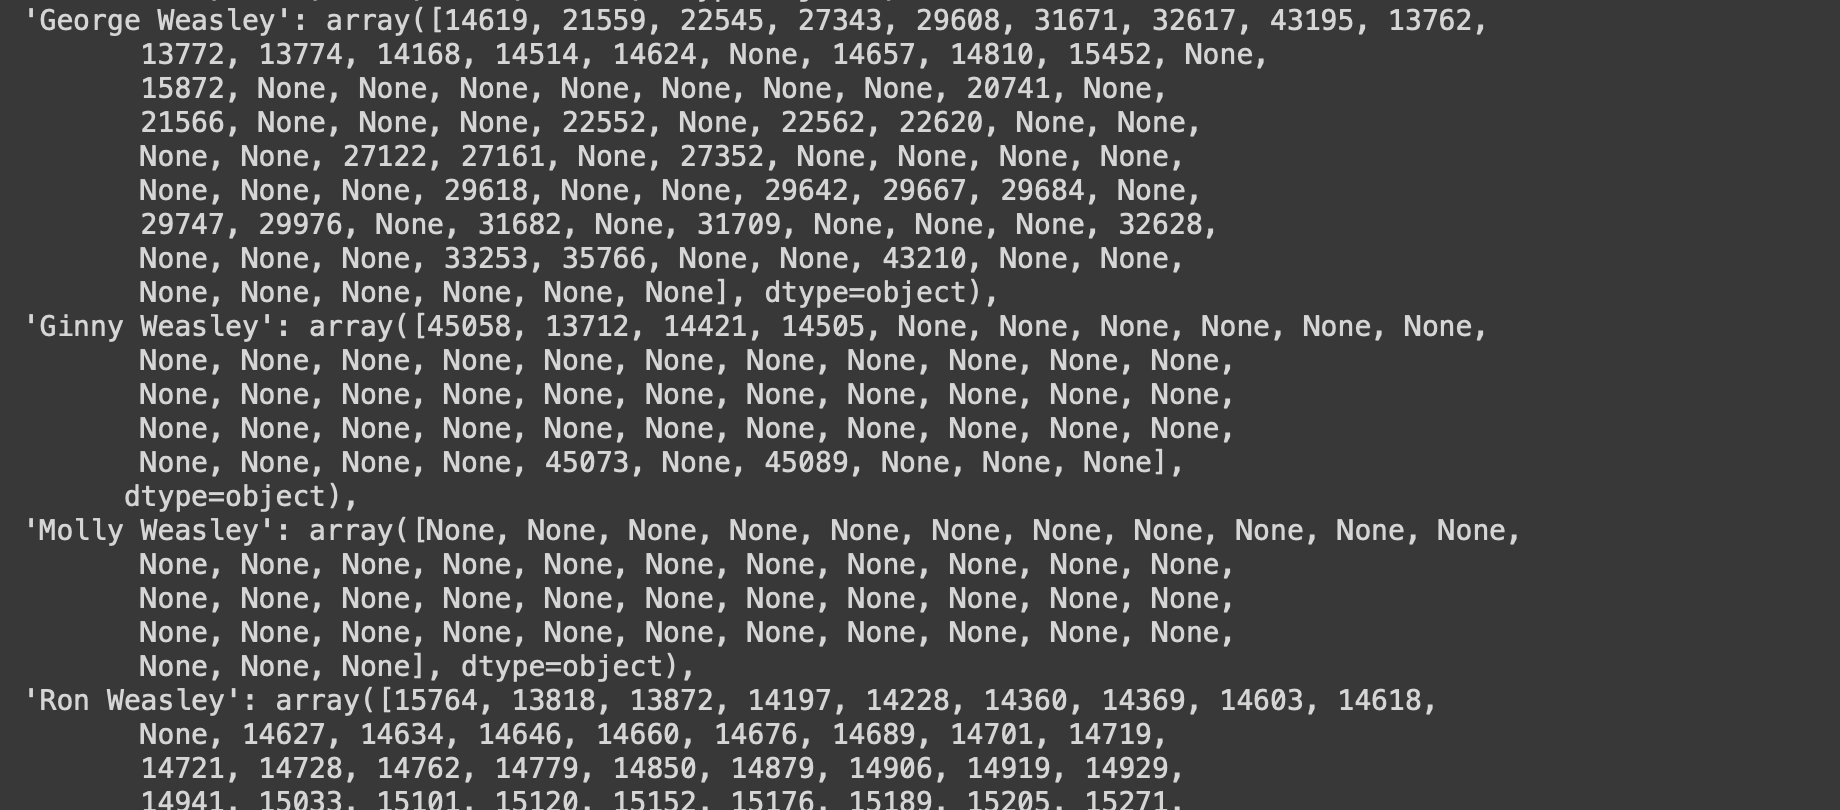

In [53]:
#this is how we solved the family problem
#but we see for main char like dumbledore, draco malfoy, voldemort, hagrid, we always just mention them by last name so we make an exclusive list for them

In [54]:
ind_dic
#sometimes it's weasleys or dursleys and it doesn't catch, it adds to everyone for potter, 

{'Wilkie Twycross': array([], dtype=float64),
 'Peter Pettigrew': array([], dtype=float64),
 'Olympe Maxime': array([], dtype=float64),
 'Zacharias Smith': array([], dtype=float64),
 'Alastor (Mad-Eye) Moody': array([], dtype=float64),
 'Stan Shunpike': array([], dtype=float64),
 'Elphias Doge': array([], dtype=float64),
 'Death Eater': array([20515]),
 'Dobby': array([], dtype=float64),
 'Kingsley Shacklebolt': array([], dtype=float64),
 'Augusta Longbottom': array([], dtype=float64),
 'Mafalda Hopkirk': array([], dtype=float64),
 'Fawkes': array([], dtype=float64),
 'Padma Patil': array([], dtype=float64),
 'Rolanda Hooch': array([], dtype=float64),
 'Pius Thicknesse': array([], dtype=float64),
 'Viktor Krum': array([], dtype=float64),
 'Augustus Rookwood': array([], dtype=float64),
 'Hermione Granger': array([15745, 16077, 16335, 17077, 19860, 20338, 21339, 21621, 21902,
        22774, 22936, 25146, 25788, 26193, 26392, 36969, 44620, 15750,
        15751, 15780, 15817, 16082, 16083,

In [55]:
#DONT REMOVE CASES FOR NAMES
def links_dic_f(indices_dic, threshold):

    link_dic = {}
    for first_char, ind_arr1 in indices_dic.items():
        dic = {}
        for second_char, ind_arr2 in indices_dic.items():
            
            # Don't count interactions with self
            if first_char == second_char:
                continue
            
            matr = np.abs(ind_arr1[np.newaxis].T - ind_arr2) <= threshold
            s = np.sum(matr)
            
            # Only include character pairs with more than 3 interactions
            if s > 3:
                dic[second_char] = s
        link_dic[first_char] = dic
    
    return link_dic
grand_dic = links_dic_f(ind_dic, 45)  #find weighted value

In [56]:
#roberta - huggin face, start w 10 sentences for interaction
#word2vec 
#try w different names for training

In [57]:
grand_dic

{'Wilkie Twycross': {},
 'Peter Pettigrew': {},
 'Olympe Maxime': {},
 'Zacharias Smith': {},
 'Alastor (Mad-Eye) Moody': {},
 'Stan Shunpike': {},
 'Elphias Doge': {},
 'Death Eater': {'Harry Potter': 4},
 'Dobby': {},
 'Kingsley Shacklebolt': {},
 'Augusta Longbottom': {},
 'Mafalda Hopkirk': {},
 'Fawkes': {},
 'Padma Patil': {},
 'Rolanda Hooch': {},
 'Pius Thicknesse': {},
 'Viktor Krum': {},
 'Augustus Rookwood': {},
 'Hermione Granger': {'Lord Voldemort': 15,
  'The Fat Lady': 4,
  'Ronan': 36,
  'Firenze': 5,
  'Charlie Weasley': 15,
  'Fang': 12,
  'Madam Rosmerta': 36,
  'Dean Thomas': 8,
  'Severus Snape': 200,
  'Lee Jordan': 11,
  'Harry Potter': 953,
  'Ron Weasley': 615,
  'Fred Weasley': 11,
  'Peeves': 9,
  'Parvati Patil': 10,
  'Gringotts': 6,
  'Norbert': 32,
  'Quirinus Quirrell': 49,
  'Scabbers': 17,
  'Minerva McGonagall': 65,
  'Hedwig': 8,
  'Fluffy': 35,
  'Draco Malfoy': 120,
  'Diagon Alley': 14,
  'Seamus Finnigan': 33,
  'Bane': 7,
  'Goyle': 22,
  'Rubeu

In [58]:
#family name issues like dumbledore with griphook
#black family
#works with nearly headless nick
#dont wanna hardcode
#ik grey lady didnt occur 
#the fat lady is wrong
#dont remove stop words
#last occurence of characters

In [59]:
def remove_zero_link_chars(link_dic, chars_list):
  rem_set = set()
  for key in link_dic:
      if link_dic[key] == {}:
          rem_set.add(key)
  
  fin_list = [char for char in chars_list if char not in rem_set]
  
  return fin_list


new_chars = remove_zero_link_chars(grand_dic, chars)

In [60]:
def edge_tuples_f(link_dic):

    edges_tuples = []
    for key in link_dic:
        for item, value in link_dic[key].items():
            tup = (key.title(), item.title(), value/100)
            edges_tuples.append(tup)

    return edges_tuples


edges_tuples = edge_tuples_f(grand_dic)

In [61]:
edges_tuples

[('Death Eater', 'Harry Potter', 0.04),
 ('Hermione Granger', 'Lord Voldemort', 0.15),
 ('Hermione Granger', 'The Fat Lady', 0.04),
 ('Hermione Granger', 'Ronan', 0.36),
 ('Hermione Granger', 'Firenze', 0.05),
 ('Hermione Granger', 'Charlie Weasley', 0.15),
 ('Hermione Granger', 'Fang', 0.12),
 ('Hermione Granger', 'Madam Rosmerta', 0.36),
 ('Hermione Granger', 'Dean Thomas', 0.08),
 ('Hermione Granger', 'Severus Snape', 2.0),
 ('Hermione Granger', 'Lee Jordan', 0.11),
 ('Hermione Granger', 'Harry Potter', 9.53),
 ('Hermione Granger', 'Ron Weasley', 6.15),
 ('Hermione Granger', 'Fred Weasley', 0.11),
 ('Hermione Granger', 'Peeves', 0.09),
 ('Hermione Granger', 'Parvati Patil', 0.1),
 ('Hermione Granger', 'Gringotts', 0.06),
 ('Hermione Granger', 'Norbert', 0.32),
 ('Hermione Granger', 'Quirinus Quirrell', 0.49),
 ('Hermione Granger', 'Scabbers', 0.17),
 ('Hermione Granger', 'Minerva Mcgonagall', 0.65),
 ('Hermione Granger', 'Hedwig', 0.08),
 ('Hermione Granger', 'Fluffy', 0.35),
 ('Her

In [62]:
def convert_to_capitals(char_list):

    
    conv_list = []
    for char in char_list:
        conv_list.append(char.title())
    
    return conv_list


node_chars = convert_to_capitals(new_chars)


In [63]:
import networkx as nx

# Create the graph
G = nx.Graph()

#Add the nodes
G.add_nodes_from(node_chars)

# Add the edges
G.add_weighted_edges_from(edges_tuples)

In [64]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import community
import community.community_louvain as community_louvain
# from networkx.algorithms import community
# Detect the communities of the graph
partition = community_louvain.best_partition(G)

# Set the community partition as an attribute of the nodes of the graph
nx.set_node_attributes(G, partition, 'group')

In [66]:
partition

{'Death Eater': 0,
 'Hermione Granger': 2,
 'Lord Voldemort': 0,
 'The Fat Lady': 2,
 'Ronan': 0,
 'Griphook': 0,
 'Firenze': 0,
 'Charlie Weasley': 1,
 'Oliver Wood': 1,
 'Fang': 2,
 'Argus Filch': 1,
 'Madam Rosmerta': 2,
 'Dean Thomas': 2,
 'Severus Snape': 2,
 'Lee Jordan': 1,
 'Harry Potter': 0,
 'Ron Weasley': 2,
 'Fred Weasley': 1,
 'Pansy Parkinson': 2,
 'Peeves': 1,
 'Petunia Dursley': 0,
 'James Potter': 0,
 'Parvati Patil': 2,
 'Gringotts': 0,
 'Norbert': 1,
 'Quirinus Quirrell': 0,
 'Scabbers': 2,
 'Godric Gryffindor': 0,
 'Minerva Mcgonagall': 0,
 'Alicia Spinnet': 1,
 'Hedwig': 0,
 'Fluffy': 2,
 'Draco Malfoy': 2,
 'Diagon Alley': 0,
 'Lily Potter': 0,
 'Seamus Finnigan': 2,
 'Ginny Weasley': 0,
 'Bane': 0,
 'Goyle': 2,
 'Rubeus Hagrid': 0,
 'Angelina Johnson': 1,
 'Percy Weasley': 1,
 'Bill Weasley': 1,
 'Justin Finch-Fletchley': 0,
 'Dudley Dursley': 0,
 'Neville Longbottom': 2,
 'Dedalus Diggle': 0,
 'Vernon Dursley': 0,
 'Marge Dursley': 0,
 'George Weasley': 1,
 'Cor

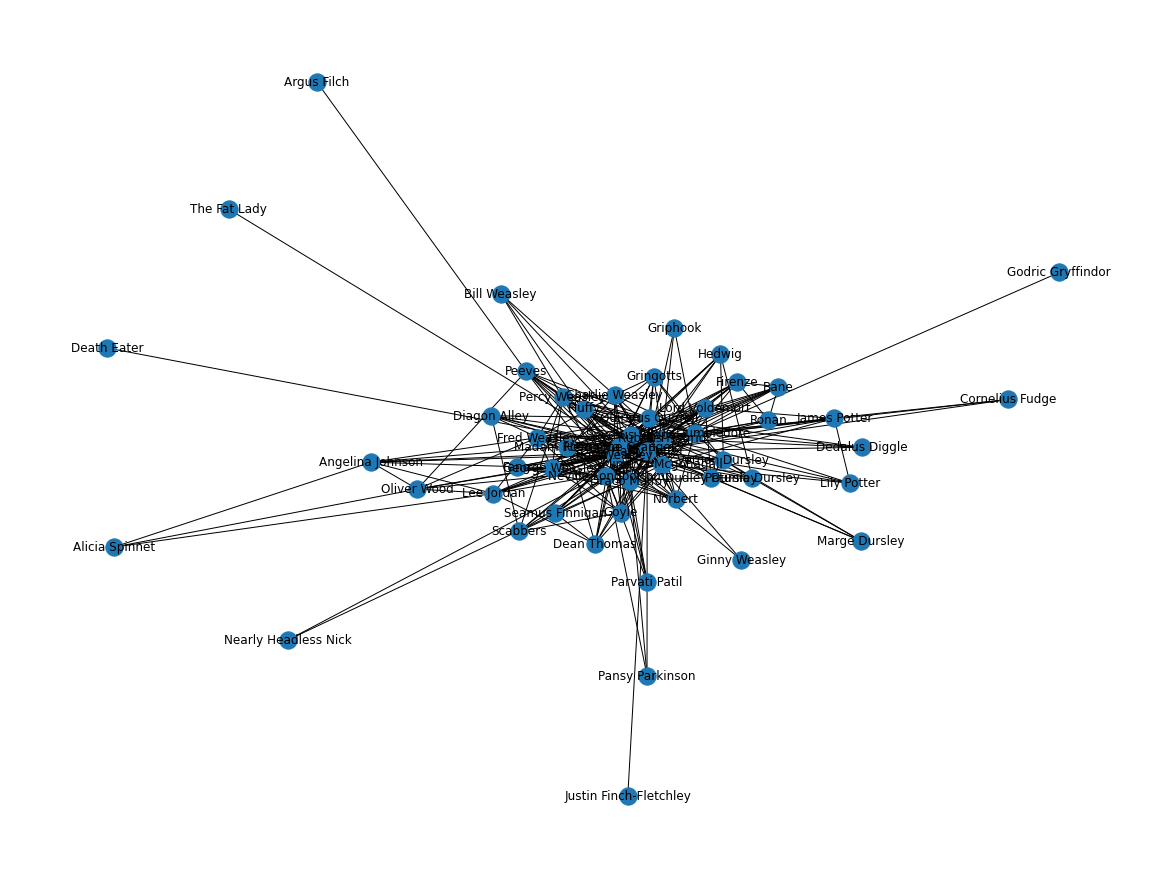

In [67]:
# nx.write_gexf(G, outfile)
from matplotlib.pyplot import figure
figure(figsize=(16, 12))
nx.draw(G, with_labels = True)

In [68]:
nx.write_graphml(G, "hp.graphml")

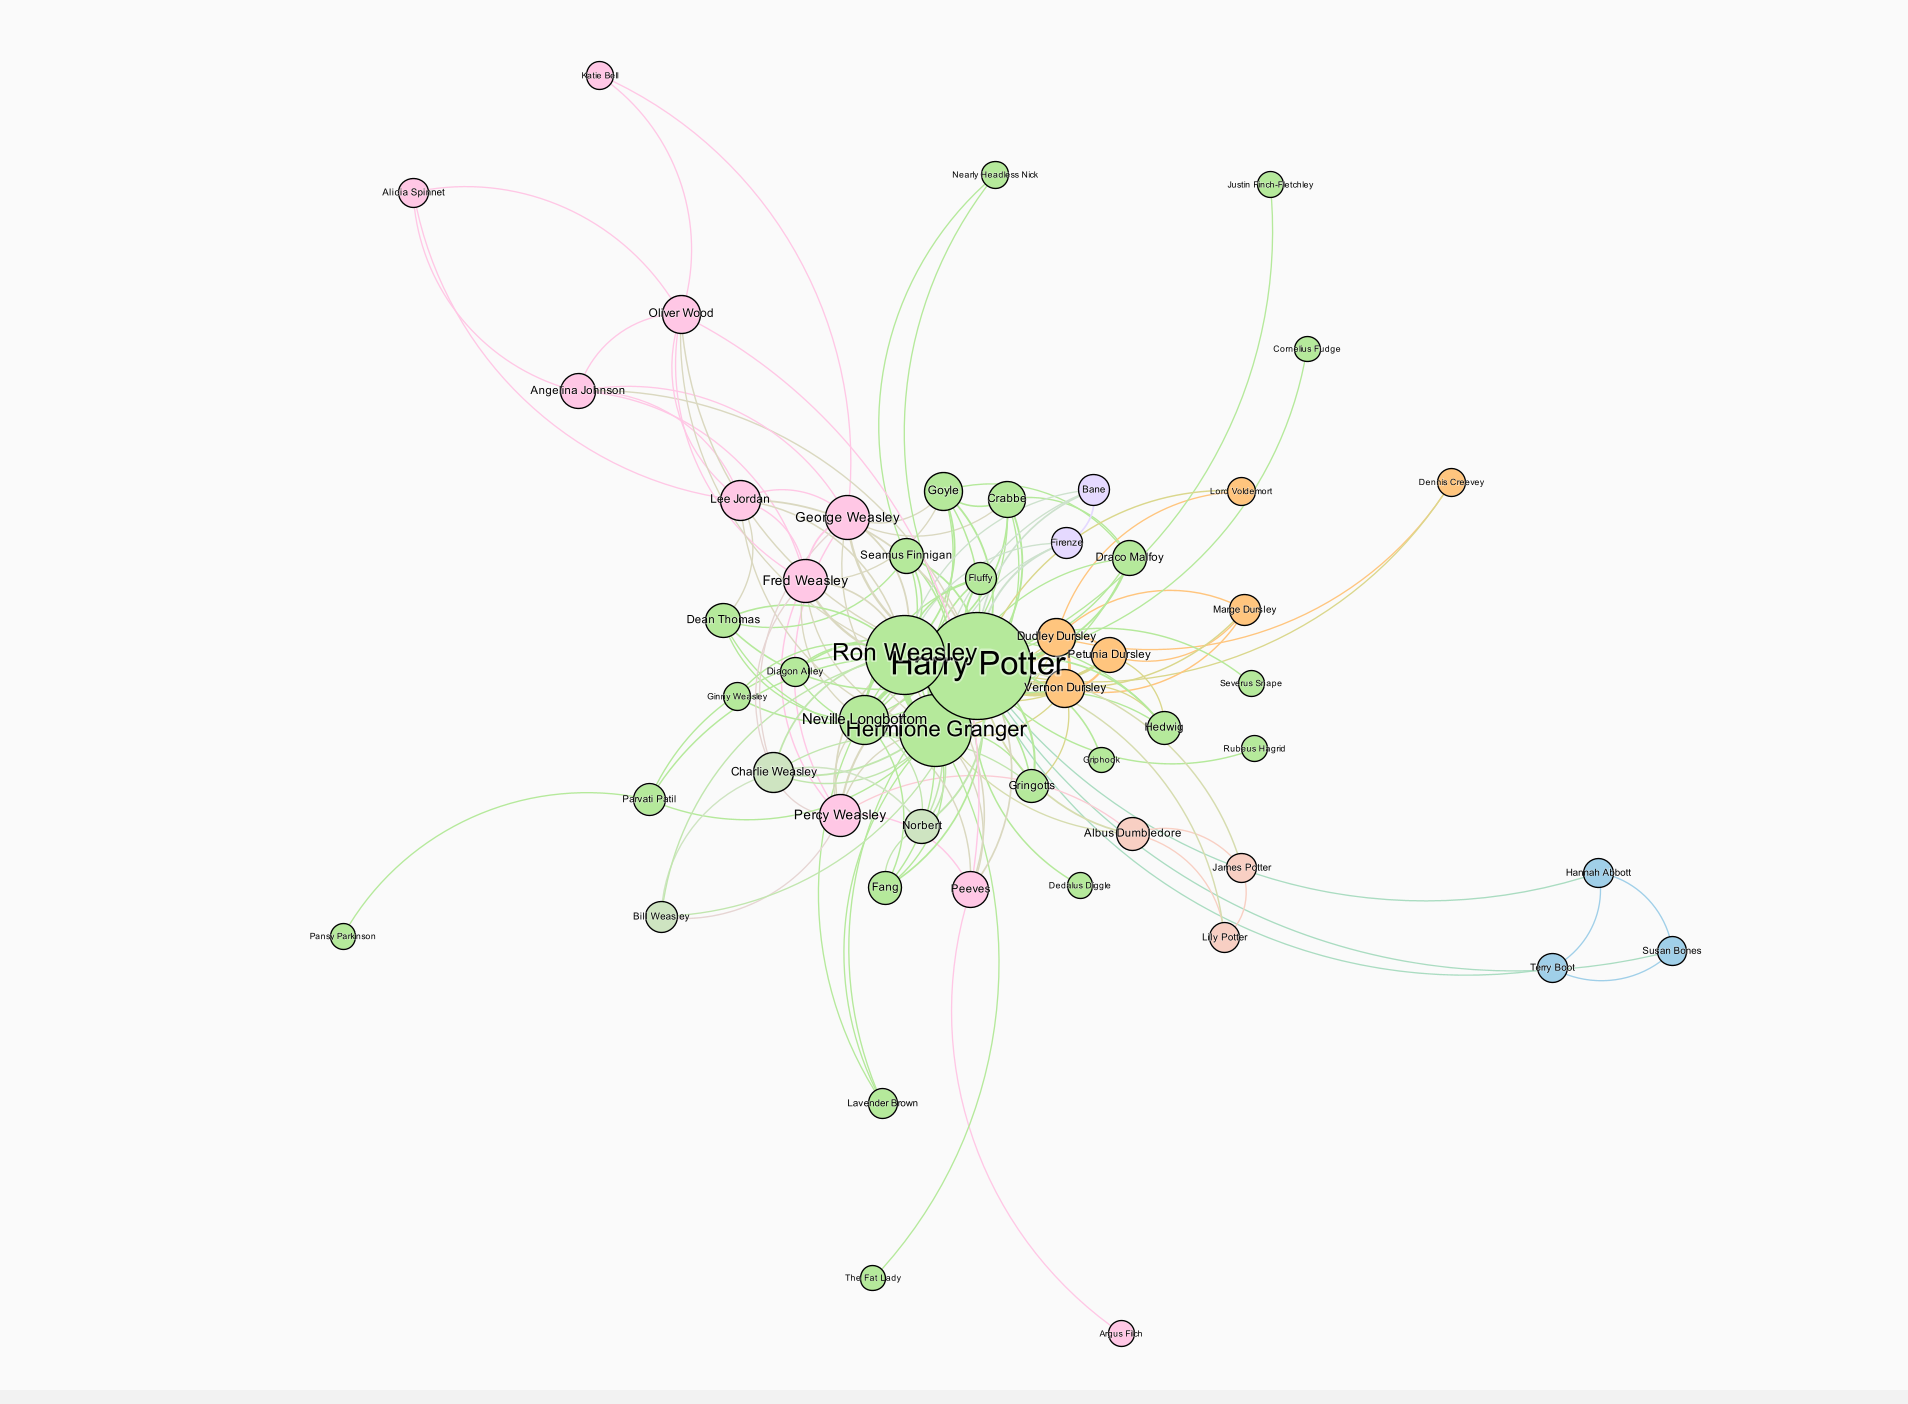

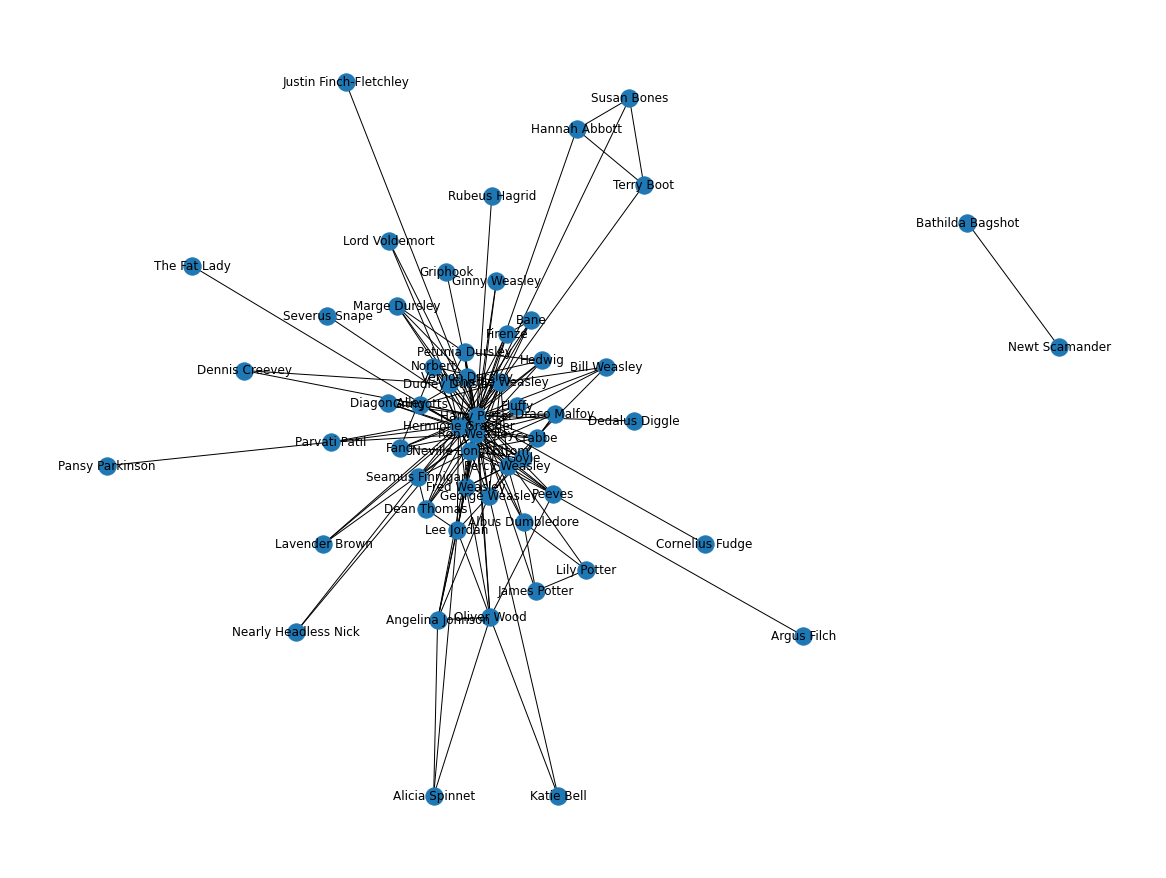

In [69]:
#we made the groups usign python, as gephi just made 3 modularity classes

In [70]:
#for peeves

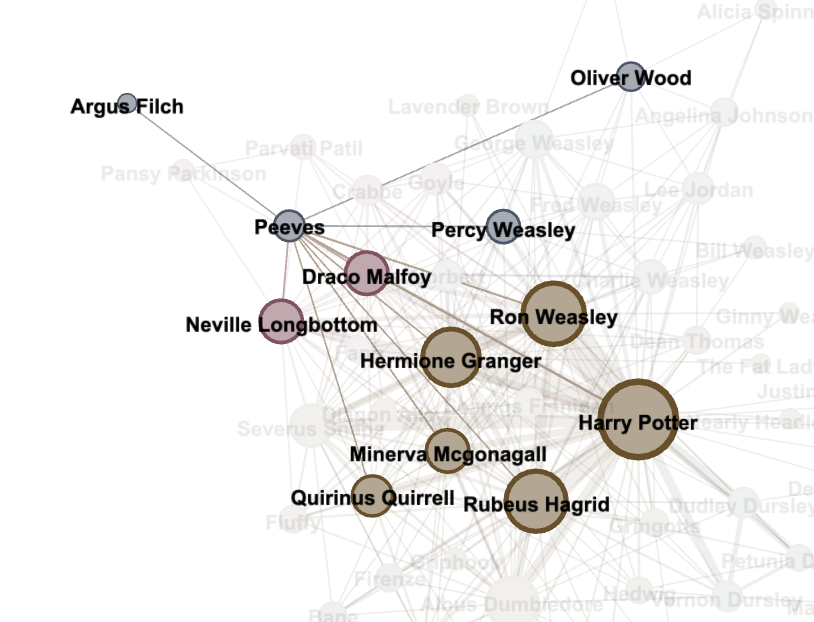